<a href="https://colab.research.google.com/github/enino84/Intro-to-Data-Analytics/blob/main/IS_Logistic_and_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_clientes = pd.read_csv('drive/MyDrive/GIC/Clientes.csv')

In [ ]:
df_clientes.head()

,index,Codigo,Nombre,Fecha,Sexo,Trabajo,Compañia,Latitud,Longitud,Tipo Cliente,Riesgo Cliente,Salario,Formación,Score Cliente
0,0,0,Jillian Russo,2003-10-05,F,Insurance claims handler,White Ltd,10.969795,-74.783629,CLIENTE PLATA,RIESGO BAJO,1.652833,1.525181,62.283745
1,1,1,Amy Mason,2005-07-18,M,"Teacher, early years/pre","Moore, Payne and Martin",10.967343,-74.778423,CLIENTE PLATA,RIESGO BAJO,2.062139,2.369680,91.711777
2,2,2,Christopher Hernandez,1992-11-26,M,Data processing manager,Sheppard-Carter,10.989181,-74.793520,CLIENTE REGULAR,RIESGO ALTO,0.924423,1.337572,49.371379
3,3,3,Donna Morris,2017-05-30,F,"Surveyor, insurance","Winters, Mcbride and Smith",10.982051,-74.786254,CLIENTE REGULAR,RIESGO BAJO,1.030737,1.442047,53.568770
4,4,4,Tiffany Brooks,1996-03-04,F,Furniture designer,"Rogers, Thompson and Howell",10.909121,-74.793174,CLIENTE ORO,RIESGO ALTO,6.313502,5.902897,240.221925


In [ ]:
df_clientes.columns

Index(['index', 'Codigo', 'Nombre', 'Fecha', 'Sexo', 'Trabajo', 'Compañia',
       'Latitud', 'Longitud', 'Tipo Cliente', 'Riesgo Cliente', 'Salario',
       'Formación', 'Score Cliente'],
      dtype='object')

In [ ]:
df_model = df_clientes[['Latitud', 'Longitud', 'Salario','Formación', 'Score Cliente']]

In [ ]:
import seaborn as sns

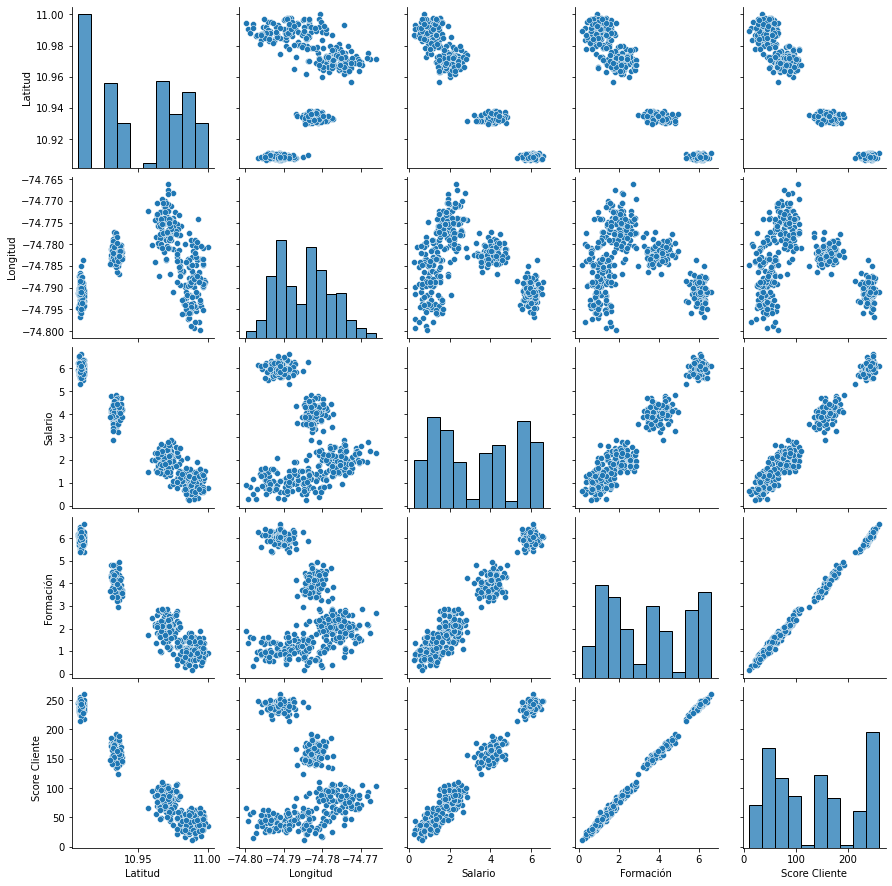

In [ ]:
sns.pairplot(data=df_model)

# https://scikit-learn.org/stable/

Score Cliente = par0 + par1 Latitud + par2 Longitud + par3 Salario + par4 Formación + error

# **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df_model, test_size=0.3)

In [ ]:
df_train.shape

(350, 5)

In [ ]:
df_test.shape

(150, 5)

In [ ]:
y_train = df_train['Score Cliente'].values;
X_train = df_train[['Latitud', 'Longitud', 'Salario','Formación']].values

In [ ]:
X_train

array([[ 10.97128186, -74.78085699,   2.80038541,   2.391014  ],
       [ 10.93039409, -74.78315909,   4.08169325,   4.383813  ],
       [ 10.98781006, -74.78963735,   1.10058882,   1.12769573],
       ...,
       [ 10.99772978, -74.7892171 ,   1.20513032,   1.3528887 ],
       [ 10.93698844, -74.78039741,   3.75725413,   3.80923015],
       [ 10.99693634, -74.78091994,   1.28202033,   0.59365467]])

# **Model Training**

https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr_trained = lr.fit(X_train, y_train)

Score Cliente = par0 + par1 Latitud + par2 Longitud + par3 Salario + par4 Formación + error

In [ ]:
lr_trained.coef_

array([-5.58553007e-13, -5.71986902e-13,  1.00000000e+01,  3.00000000e+01])

In [ ]:
lr_trained.intercept_

-3.6635583455790766e-11

# **Validation**

In [ ]:
y_test = df_test['Score Cliente'].values;
X_test = df_test[['Latitud', 'Longitud', 'Salario','Formación']].values

In [ ]:
lr_trained.score(X_test, y_test)

1.0

# **Predict**

In [ ]:
lr_trained.predict(X_test)

array([ 42.82346507,  65.4603992 , 248.75341029, 249.89398381,
       151.62488437, 243.21275655, 237.80939514,  39.76686963,
        44.08959855, 238.66738087,  36.00105938,  91.4220414 ,
       174.7890948 , 165.03222167,  58.99407908, 240.54889669,
       103.73374972,  67.13930229,  77.46831238, 177.73633158,
       232.7251249 ,  43.73120535, 240.22192517, 236.58065007,
       144.24213366, 236.51091398,  94.90976878,  36.39271611,
        62.28374545,  79.73901341, 234.34324305, 165.6851481 ,
       242.57158743,  22.99236355,  47.99042233, 240.97240527,
        22.18681387, 235.79321803,  69.28138215, 143.07332595,
       252.45689317, 157.79053194, 241.78523841, 153.67430105,
       155.99988209, 243.89680885, 241.08152991, 184.70803304,
       222.32984159, 156.45531144,  38.97609809,  93.79307595,
       138.96195228, 103.21656404,  48.50591975, 231.2329695 ,
        17.88481338,  97.79130477, 238.25472045, 242.59197071,
       248.16182954, 259.88171879,  77.94104692,  50.08

In [ ]:
y_test

array([ 42.82346507,  65.4603992 , 248.75341029, 249.89398381,
       151.62488437, 243.21275655, 237.80939514,  39.76686963,
        44.08959855, 238.66738087,  36.00105938,  91.4220414 ,
       174.7890948 , 165.03222167,  58.99407908, 240.54889669,
       103.73374972,  67.13930229,  77.46831238, 177.73633158,
       232.7251249 ,  43.73120535, 240.22192517, 236.58065007,
       144.24213366, 236.51091398,  94.90976878,  36.39271611,
        62.28374545,  79.73901341, 234.34324305, 165.6851481 ,
       242.57158743,  22.99236355,  47.99042233, 240.97240527,
        22.18681387, 235.79321803,  69.28138215, 143.07332595,
       252.45689317, 157.79053194, 241.78523841, 153.67430105,
       155.99988209, 243.89680885, 241.08152991, 184.70803304,
       222.32984159, 156.45531144,  38.97609809,  93.79307595,
       138.96195228, 103.21656404,  48.50591975, 231.2329695 ,
        17.88481338,  97.79130477, 238.25472045, 242.59197071,
       248.16182954, 259.88171879,  77.94104692,  50.08

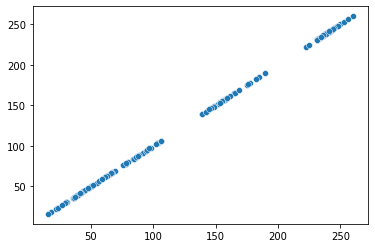

In [ ]:
sns.scatterplot(x=y_test, y=lr_trained.predict(X_test))

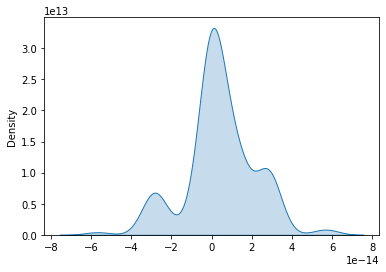

In [ ]:
sns.kdeplot(x=y_test-lr_trained.predict(X_test), shade=True)

[estimado-1.5, estimado+1.5]

# **Logistic Model**

<img src="https://images.squarespace-cdn.com/content/v1/54e50c15e4b058fc6806d068/1560340419704-W6NNEZH31GR8RSW2P6BM/logistic-regression-s-shape.png?format=500w" width=60%>

In [ ]:
from sklearn.linear_model import LogisticRegression

df_model = df_clientes[['Latitud', 'Longitud', 'Salario','Formación', 'Riesgo Cliente']]
df_train, df_test = train_test_split(df_model, test_size=0.3)
y_train = df_train['Riesgo Cliente'].values;
X_train = df_train[['Latitud', 'Longitud', 'Salario','Formación']].values

lo = LogisticRegression();
lo_trained = lo.fit(X_train, y_train)

y_test = df_test['Riesgo Cliente'].values;
X_test = df_test[['Latitud', 'Longitud', 'Salario','Formación']].values

lo_trained.predict(X_test)

lo_trained.score(X_test, y_test)


0.5533333333333333

In [ ]:
import numpy as np

In [ ]:
np.sum(lo_trained.predict(X_test)==y_test)/len(y_test)

0.5533333333333333